In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('Airline_Delay_Cause.csv')  

# Inspect the data by showing top 5 rows
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",76.0,1.0,1.00,0.0,...,0.0,0.00,0.0,0.0,47.0,47.0,0.0,0.0,0.0,0.0
1,2023,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",6.0,1.0,0.65,0.0,...,0.0,0.00,0.0,0.0,52.0,34.0,0.0,18.0,0.0,0.0
2,2023,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",59.0,4.0,2.71,1.0,...,0.0,0.00,0.0,0.0,157.0,106.0,33.0,18.0,0.0,0.0
3,2023,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",154.0,4.0,2.00,0.0,...,0.0,0.00,0.0,0.0,91.0,51.0,0.0,40.0,0.0,0.0
4,2023,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",45.0,4.0,2.35,0.0,...,0.0,1.65,0.0,0.0,92.0,49.0,0.0,0.0,0.0,43.0


In [191]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
341225,2004,1,DL,Delta Air Lines Inc.,OKC,"Oklahoma City, OK: Will Rogers World",107.0,37.0,8.84,1.96,...,0.0,11.30,1.0,1.0,1626.0,594.0,66.0,378.0,0.0,588.0
341226,2004,1,DL,Delta Air Lines Inc.,OMA,"Omaha, NE: Eppley Airfield",62.0,20.0,6.06,0.03,...,0.0,3.58,1.0,0.0,642.0,193.0,2.0,265.0,0.0,182.0
341227,2004,1,DL,Delta Air Lines Inc.,ONT,"Ontario, CA: Ontario International",121.0,32.0,7.99,0.11,...,0.0,8.75,1.0,0.0,1135.0,305.0,5.0,420.0,0.0,405.0
341228,2004,1,DL,Delta Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",545.0,253.0,26.69,2.80,...,0.0,25.29,45.0,0.0,13209.0,1718.0,226.0,9619.0,0.0,1646.0
341229,2004,1,DL,Delta Air Lines Inc.,ORF,"Norfolk, VA: Norfolk International",241.0,42.0,16.48,0.17,...,0.0,12.83,4.0,0.0,1741.0,696.0,15.0,517.0,0.0,513.0


In [192]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341230 entries, 0 to 341229
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 341230 non-null  int64  
 1   month                341230 non-null  int64  
 2   carrier              341230 non-null  object 
 3   carrier_name         341230 non-null  object 
 4   airport              341230 non-null  object 
 5   airport_name         341230 non-null  object 
 6   arr_flights          340727 non-null  float64
 7   arr_del15            340489 non-null  float64
 8   carrier_ct           340727 non-null  float64
 9   weather_ct           340727 non-null  float64
 10  nas_ct               340727 non-null  float64
 11  security_ct          340727 non-null  float64
 12  late_aircraft_ct     340727 non-null  float64
 13  arr_cancelled        340727 non-null  float64
 14  arr_diverted         340727 non-null  float64
 15  arr_delay        

In [193]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,341230.000000,341230.000000,340727.000000,340489.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000,340727.000000
mean,2013.602350,6.476620,377.365692,72.762791,21.474484,2.607697,23.245811,0.180381,25.203643,7.170095,0.869010,4292.007469,1344.739800,225.517400,1072.475081,7.433089,1641.839141
std,5.952636,3.439562,1018.978610,198.570723,49.283126,9.881909,81.767023,0.842580,76.360532,36.865127,3.912953,12834.020039,3786.142974,877.041168,4473.362778,40.054566,5144.192637
min,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2008.000000,3.000000,58.000000,9.000000,3.000000,0.000000,1.540000,0.000000,1.630000,0.000000,0.000000,430.000000,146.000000,0.000000,53.000000,0.000000,79.000000
50%,2013.000000,6.000000,119.000000,22.000000,8.070000,0.580000,5.220000,0.000000,5.830000,1.000000,0.000000,1196.000000,438.000000,25.000000,194.000000,0.000000,355.000000
75%,2019.000000,9.000000,269.000000,55.000000,19.730000,2.000000,14.780000,0.000000,17.060000,4.000000,1.000000,3101.000000,1122.000000,161.000000,585.000000,0.000000,1129.000000
max,2023.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,2069.070000,4951.000000,256.000000,438783.000000,196944.000000,57707.000000,238440.000000,3760.000000,227959.000000


In [194]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

# Print the total number of rows in the DataFrame
total_rows = len(df)
print("\nTotal number of rows:", total_rows)

Missing values count per column:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            503
arr_del15              741
carrier_ct             503
weather_ct             503
nas_ct                 503
security_ct            503
late_aircraft_ct       503
arr_cancelled          503
arr_diverted           503
arr_delay              503
carrier_delay          503
weather_delay          503
nas_delay              503
security_delay         503
late_aircraft_delay    503
dtype: int64

Total number of rows: 341230


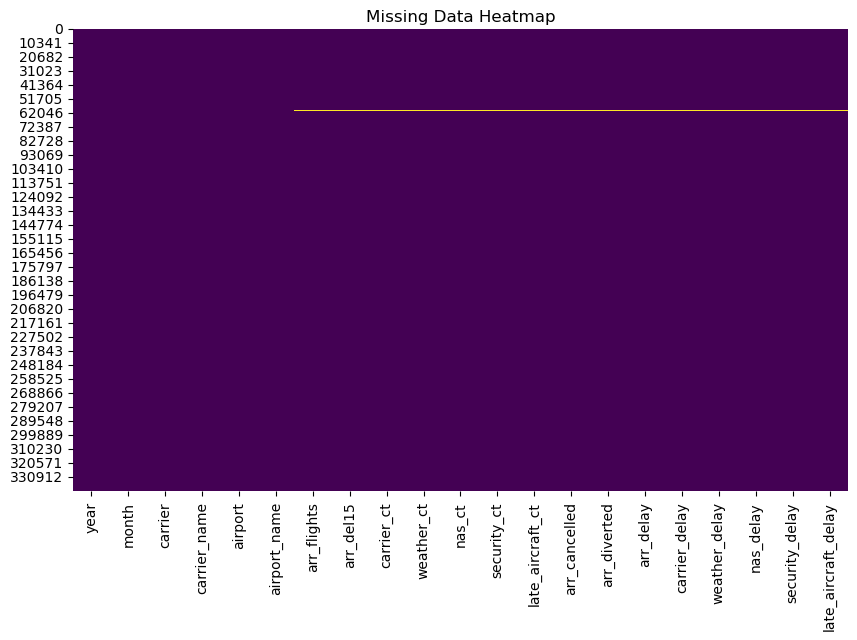

In [195]:
# Generate heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [196]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
8550,2023,6,MQ,Envoy Air,CLL,"College Station/Bryan, TX: Easterwood Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8564,2023,6,MQ,Envoy Air,EUG,"Eugene, OR: Mahlon Sweet Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8568,2023,6,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8574,2023,6,MQ,Envoy Air,GRB,"Green Bay, WI: Green Bay Austin Straubel Inter...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8580,2023,6,MQ,Envoy Air,HPN,"White Plains, NY: Westchester County",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337503,2004,3,EV,Atlantic Southeast Airlines,CAK,"Akron, OH: Akron-Canton Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338230,2004,3,TZ,ATA Airlines d/b/a ATA,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338869,2004,2,EV,Atlantic Southeast Airlines,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338878,2004,2,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df.dropna(inplace=True)

In [198]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

# Print the total number of rows in the DataFrame
total_rows = len(df)
print("\nTotal number of rows:", total_rows)

Missing values count per column:
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

Total number of rows: 340489


In [199]:
#Create new variables
total_flights_sum = df['arr_flights'].sum()
delays_by_year = df.groupby('year')['arr_del15'].sum()
delays_by_month = df.groupby('month')['arr_del15'].sum()
delays_by_year_month = df.groupby(['year', 'month'])['arr_del15'].sum()
flights_by_year = df.groupby('year')['arr_flights'].sum()
flights_by_month = df.groupby('month')['arr_flights'].sum()
flights_by_year_month = df.groupby(['year', 'month'])['arr_flights'].sum()
delay_percentage_by_year = round((delays_by_year / flights_by_year) * 100, 2)
delay_percentage_by_month = round((delays_by_month / flights_by_month) * 100, 2)
monthly_flight_percentage = round((flights_by_month / total_flights_sum) * 100, 2)
yearly_flight_percentage = round((flights_by_year / total_flights_sum) * 100, 2)
delays_by_carrier = df.groupby('carrier_name')['arr_del15'].sum()
delays_by_carrier_year = df.groupby(['carrier_name', 'year'])['arr_del15'].sum()
delays_by_carrier_2023 = delays_by_carrier_year.loc[:, 2023]
flights_by_carrier = df.groupby('carrier_name')['arr_flights'].sum()
flights_by_carrier_year = df.groupby(['carrier_name', 'year'])['arr_flights'].sum()
flights_by_carrier_2023 = flights_by_carrier_year.loc[:, 2023]
delays_percentage_by_carrier_2023 = round((delays_by_carrier_2023 / flights_by_carrier_2023) * 100, 2)
cancelled_by_carrier = df.groupby('carrier_name')['arr_cancelled'].sum()
cancelled_by_carrier_year = df.groupby(['carrier_name', 'year'])['arr_cancelled'].sum()
cancelled_by_carrier_2023 = cancelled_by_carrier_year.loc[:, 2023]
delays_by_carrier_2023_pct = round((delays_by_carrier_2023 / flights_by_carrier_2023) * 100, 2)
cancelled_by_carrier_2023_pct = round((cancelled_by_carrier_2023 / flights_by_carrier_2023) * 100, 2)
print(delay_percentage_by_year)
print(delay_percentage_by_month)
print(delays_by_year)
print(flights_by_year)
print(delays_by_month)
print(flights_by_month)
print(monthly_flight_percentage)
print(yearly_flight_percentage)
print(delays_by_carrier)
print(delays_by_carrier_year.head())
print(delays_by_carrier_2023)
print(flights_by_carrier)
print(flights_by_carrier_year.head())
print(flights_by_carrier_2023)
print(delays_percentage_by_carrier_2023)
print(cancelled_by_carrier_2023)

year
2004    19.94
2005    20.53
2006    22.62
2007    24.20
2008    21.75
2009    18.89
2010    18.21
2011    18.24
2012    16.65
2013    19.93
2014    21.32
2015    18.28
2016    17.16
2017    18.14
2018    18.76
2019    18.72
2020     9.22
2021    16.85
2022    20.46
2023    20.67
dtype: float64
month
1     19.52
2     19.66
3     18.74
4     17.71
5     18.47
6     23.34
7     22.70
8     20.29
9     14.97
10    16.51
11    15.74
12    23.30
dtype: float64
year
2004    1421391.0
2005    1466065.0
2006    1615537.0
2007    1804028.0
2008    1524735.0
2009    1218288.0
2010    1174884.0
2011    1109872.0
2012    1015158.0
2013    1269277.0
2014    1240528.0
2015    1063439.0
2016     964239.0
2017    1029474.0
2018    1352165.0
2019    1389253.0
2020     431921.0
2021    1010332.0
2022    1376798.0
2023    1297546.0
Name: arr_del15, dtype: float64
year
2004    7129270.0
2005    7140595.0
2006    7141922.0
2007    7455458.0
2008    7009706.0
2009    6450279.0
2010    6450109.0
2011   

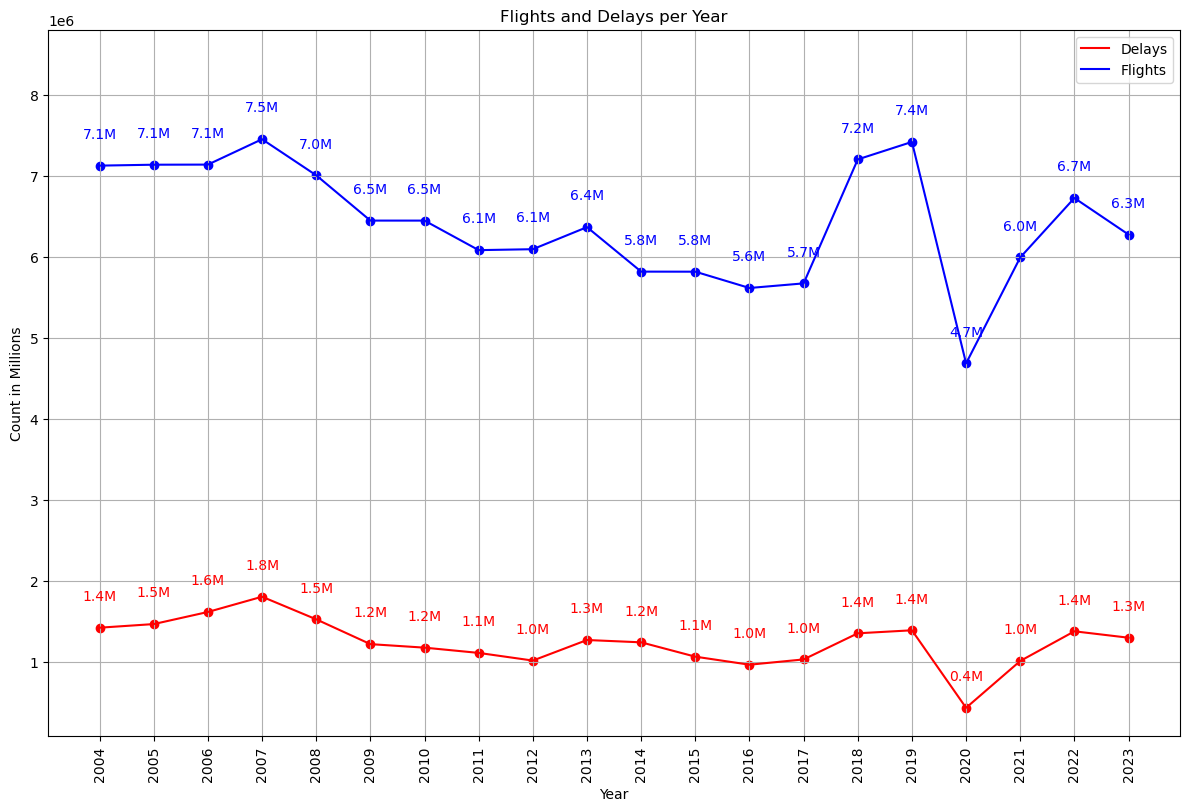

In [200]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(delays_by_year.index, delays_by_year, color='red', label='Delays')

# Plot flights per year
plt.plot(flights_by_year.index, flights_by_year, color='blue', label='Flights')

# Adding labels and title
plt.title('Flights and Delays per Year')
plt.xlabel('Year')
plt.ylabel('Count in Millions')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set x ticks for each year and rotate them by 90 degrees
plt.xticks(delays_by_year.index, rotation=90)

# Add labels for number of delays and flights for each year
delays_by_year_millions = delays_by_year / 1_000_000
flights_by_year_millions = flights_by_year / 1_000_000

# Add a dot on each year
ax.scatter(delays_by_year.index, delays_by_year, color='red')
ax.scatter(flights_by_year.index, flights_by_year, color='blue')

# Add labels for number of delays and flights for each year
for year in delays_by_year.index:
    ax.text(year, delays_by_year[year] + 300000, f"{delays_by_year[year] / 1000000:.1f}M", ha='center', va='bottom', color='red')
    ax.text(year, flights_by_year[year] + 300000, f"{flights_by_year[year] / 1000000:.1f}M", ha='center', va='bottom', color='blue')
    
# Set y-axis limits 1 million higher
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + 1000000)    

# Show plot
plt.show()

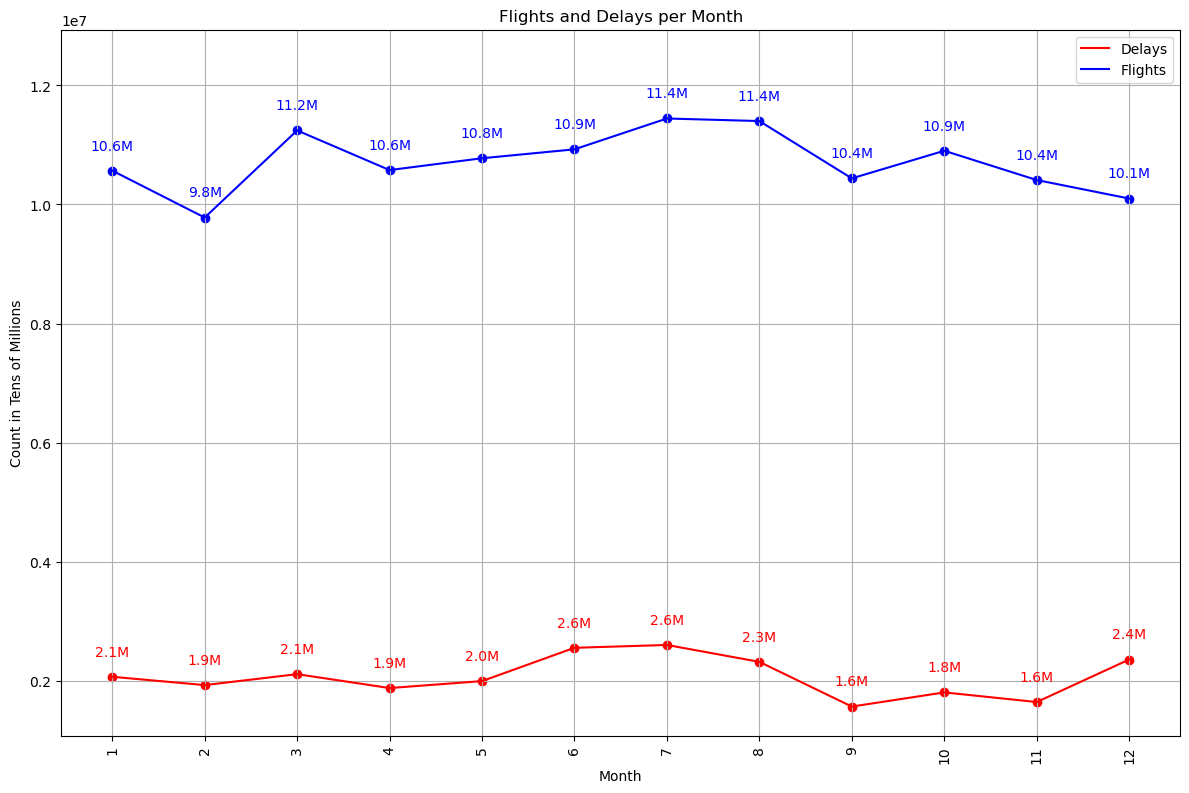

In [201]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(delays_by_month.index, delays_by_month, color='red', label='Delays')

# Plot flights per month
plt.plot(flights_by_month.index, flights_by_month, color='blue', label='Flights')

# Adding labels and title
plt.title('Flights and Delays per Month')
plt.xlabel('Month')
plt.ylabel('Count in Tens of Millions')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set x ticks for each month and rotate them by 90 degrees
plt.xticks(delays_by_month.index, rotation=90)

# Add labels for number of delays and flights for each month
delays_by_month_millions = delays_by_month / 1_000_000
flights_by_month_millions = flights_by_month / 1_000_000

# Add a dot on each month
ax.scatter(delays_by_month.index, delays_by_month, color='red')
ax.scatter(flights_by_month.index, flights_by_month, color='blue')

# Add labels for number of delays and flights for each month
for month in delays_by_month.index:
    ax.text(month, delays_by_month[month] + 300000, f"{delays_by_month[month] / 1000000:.1f}M", ha='center', va='bottom', color='red')
    ax.text(month, flights_by_month[month] + 300000, f"{flights_by_month[month] / 1000000:.1f}M", ha='center', va='bottom', color='blue')
    
# Set y-axis limits higher
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + 1000000)    

# Show plot
plt.show()


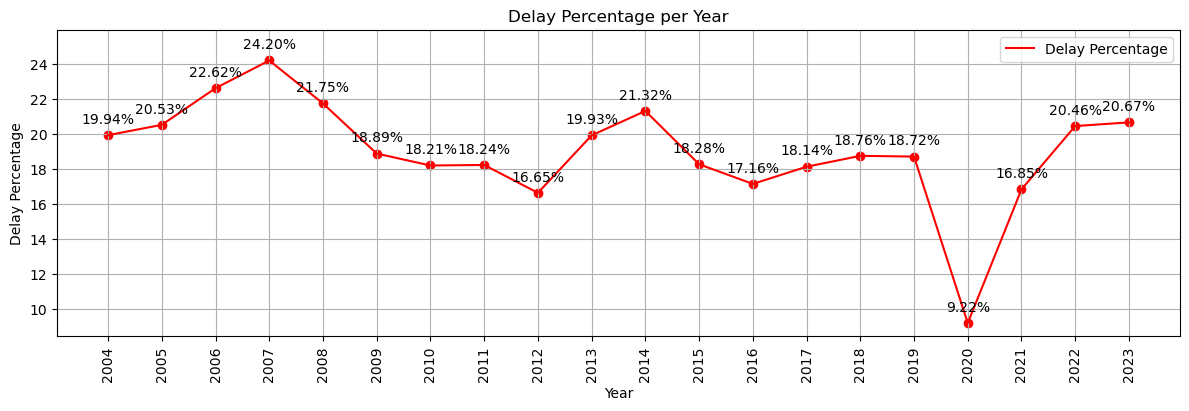

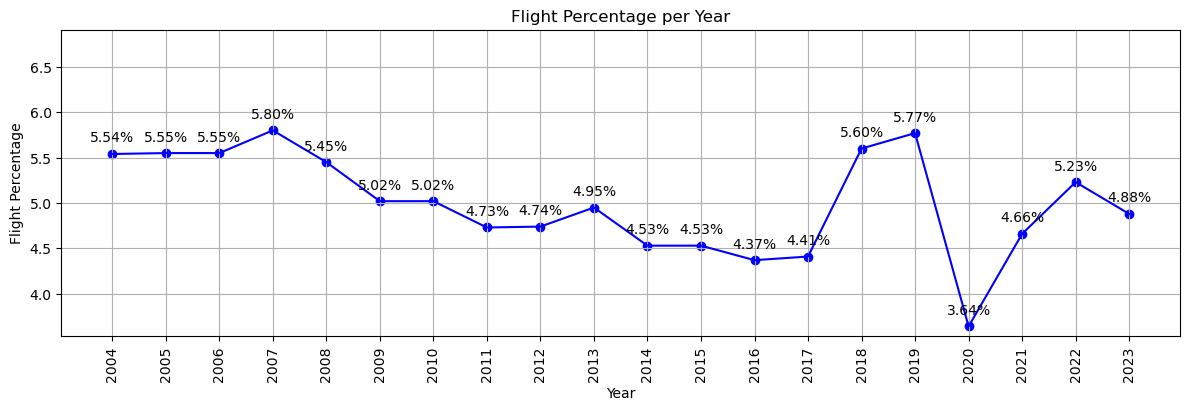

In [208]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot delay percentage by year
ax.plot(delay_percentage_by_year.index, delay_percentage_by_year, color='red', label='Delay Percentage')

# Adding labels and title
plt.title('Delay Percentage per Year')
plt.xlabel('Year')
plt.ylabel('Delay Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set x ticks for each year and rotate them by 90 degrees
plt.xticks(delay_percentage_by_year.index, rotation=90)

# Add a dot on each month
ax.scatter(delay_percentage_by_year.index, delay_percentage_by_year, color='red')

# Add labels for delay percentage for each year
for year in delay_percentage_by_year.index:
    ax.text(year, delay_percentage_by_year[year] + .5, f"{delay_percentage_by_year[year]:.2f}%", ha='center', va='bottom', color='black')

# Set y-axis limits higher
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + 1)    

#fig 2
fig2, ax2 = plt.subplots(figsize=(12, 4))

# Plot yearly flight percentage
ax2.plot(yearly_flight_percentage.index, yearly_flight_percentage, color='blue', label='Flight Percentage')

# Adding labels and title
plt.title('Flight Percentage per Year')
plt.xlabel('Year')
plt.ylabel('Flight Percentage')
plt.grid(True)
plt.tight_layout()

# Set x ticks for each year and rotate them by 90 degrees
plt.xticks(yearly_flight_percentage.index, rotation=90)

# Add a dot on each year
ax2.scatter(yearly_flight_percentage.index, yearly_flight_percentage, color='blue')

# Add labels for flight percentage for each year
for year in yearly_flight_percentage.index:
    ax2.text(year, yearly_flight_percentage[year] + .1, f"{yearly_flight_percentage[year]:.2f}%", ha='center', va='bottom', color='black')

# Set y-axis limits higher
ax2.set_ylim(ax2.get_ylim()[0], ax2.get_ylim()[1] + 1)  

# Show plot
plt.show()



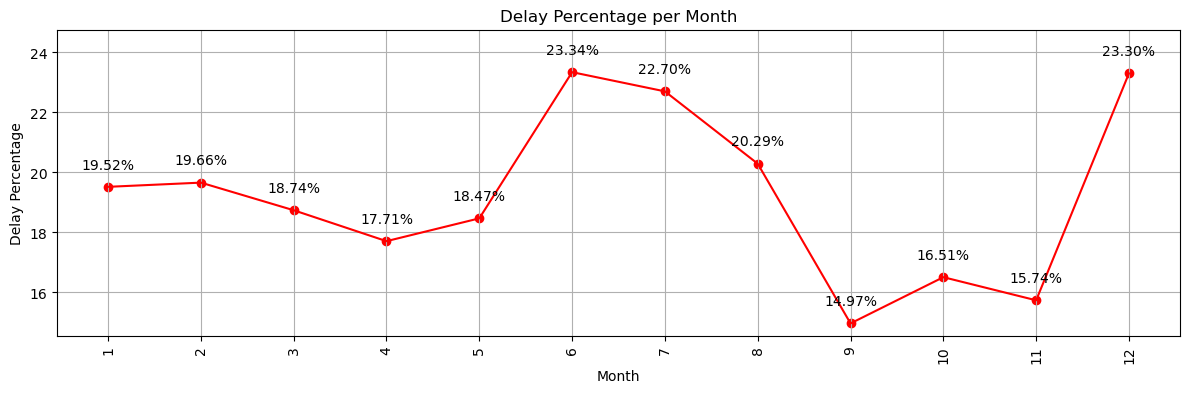

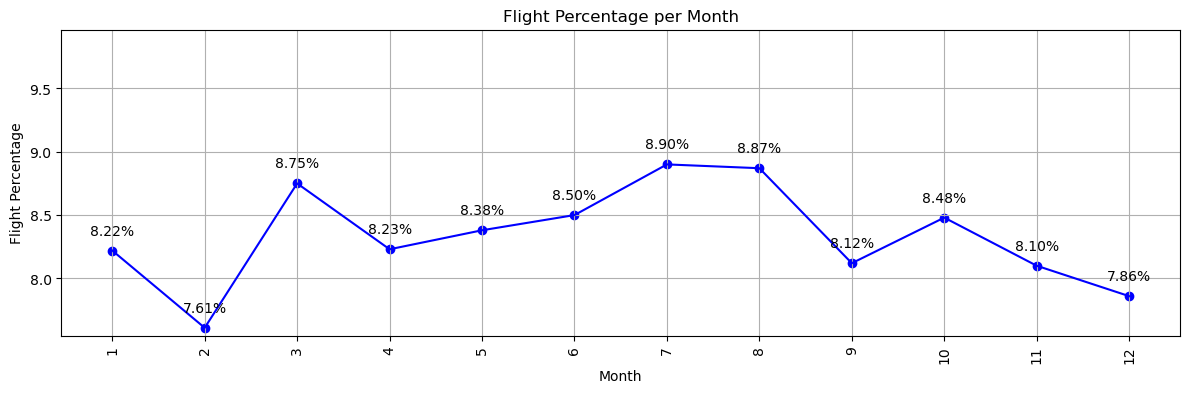

In [203]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot delay percentage by month
ax.plot(delay_percentage_by_month.index, delay_percentage_by_month, color='red', label='Delay Percentage')

# Adding labels and title
plt.title('Delay Percentage per Month')
plt.xlabel('Month')
plt.ylabel('Delay Percentage')
plt.grid(True)
plt.tight_layout()

# Set x ticks for each month and rotate them by 90 degrees
plt.xticks(delay_percentage_by_month.index, rotation=90)

# Add a dot on each month
ax.scatter(delay_percentage_by_month.index, delay_percentage_by_month, color='red')

# Add labels for delay percentage for each month
for month in delay_percentage_by_month.index:
    ax.text(month, delay_percentage_by_month[month] + .5, f"{delay_percentage_by_month[month]:.2f}%", ha='center', va='bottom', color='black')

# Set y-axis limits higher
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + 1)    

#fig2
fig2, ax2 = plt.subplots(figsize=(12, 4))

# Plot monthly flight percentage
ax2.plot(monthly_flight_percentage.index, monthly_flight_percentage, color='blue', label='Flight Percentage')

# Adding labels and title
plt.title('Flight Percentage per Month')
plt.xlabel('Month')
plt.ylabel('Flight Percentage')
plt.grid(True)
plt.tight_layout()

# Set x ticks for each month and rotate them by 90 degrees
plt.xticks(monthly_flight_percentage.index, rotation=90)

# Add a dot on each month
ax2.scatter(monthly_flight_percentage.index, monthly_flight_percentage, color='blue')

# Add labels for flight percentage for each month
for month in monthly_flight_percentage.index:
    ax2.text(month, monthly_flight_percentage[month] + .1, f"{monthly_flight_percentage[month]:.2f}%", ha='center', va='bottom', color='black')

# Set y-axis limits higher
ax2.set_ylim(ax2.get_ylim()[0], ax2.get_ylim()[1] + 1)  

# Show plot
plt.show()


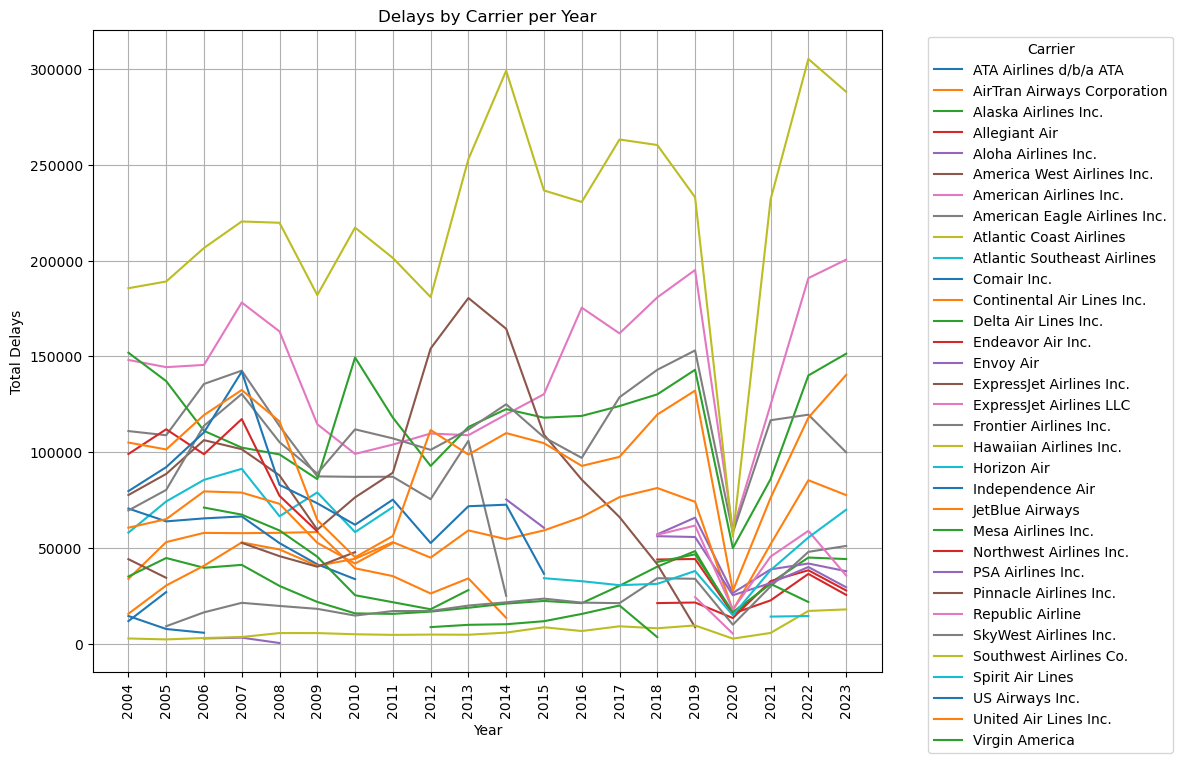

In [204]:
# Pivot the data to have carriers as columns
delays_by_carrier_year_pivot = df.pivot_table(index='year', columns='carrier_name', values='arr_del15', aggfunc='sum')

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each carrier and plot as a separate line
for carrier in delays_by_carrier_year_pivot.columns:
    ax.plot(delays_by_carrier_year_pivot.index, delays_by_carrier_year_pivot[carrier], label=carrier)

# Set x ticks for each month and rotate them by 90 degrees
plt.xticks(delays_by_carrier_year_pivot.index, rotation=90)

# Adding labels and title
plt.title('Delays by Carrier per Year')
plt.xlabel('Year')
plt.ylabel('Total Delays')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

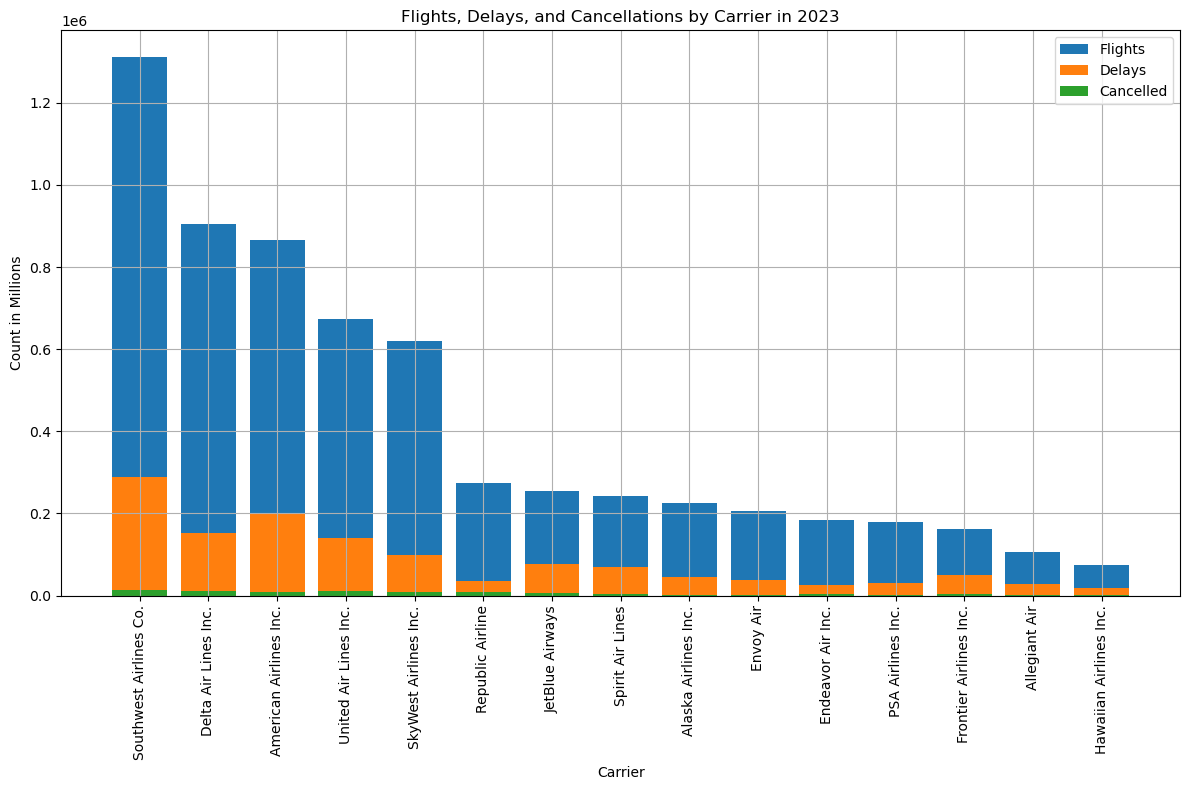

In [207]:
# Sort carriers by the number of flights in 2023
sorted_carriers = flights_by_carrier_2023.sort_values(ascending=False).index

# Sort delays and flights data based on sorted carriers
sorted_delays = delays_by_carrier_2023.reindex(sorted_carriers)
sorted_flights = flights_by_carrier_2023.reindex(sorted_carriers)
sorted_cancelled = cancelled_by_carrier_2023.reindex(sorted_carriers)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Plot delays and flights for 2023
bar_width = 0.35
index = range(len(sorted_carriers))

ax.bar(index, sorted_flights, label='Flights')
ax.bar(index, sorted_delays, label='Delays')
ax.bar(index, sorted_cancelled, label='Cancelled')


# Adding labels and title
plt.title('Flights, Delays, and Cancellations by Carrier in 2023')
plt.xlabel('Carrier')
plt.ylabel('Count in Millions')
plt.xticks(index, sorted_carriers, rotation=90)  # Set x-axis labels to carrier names
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


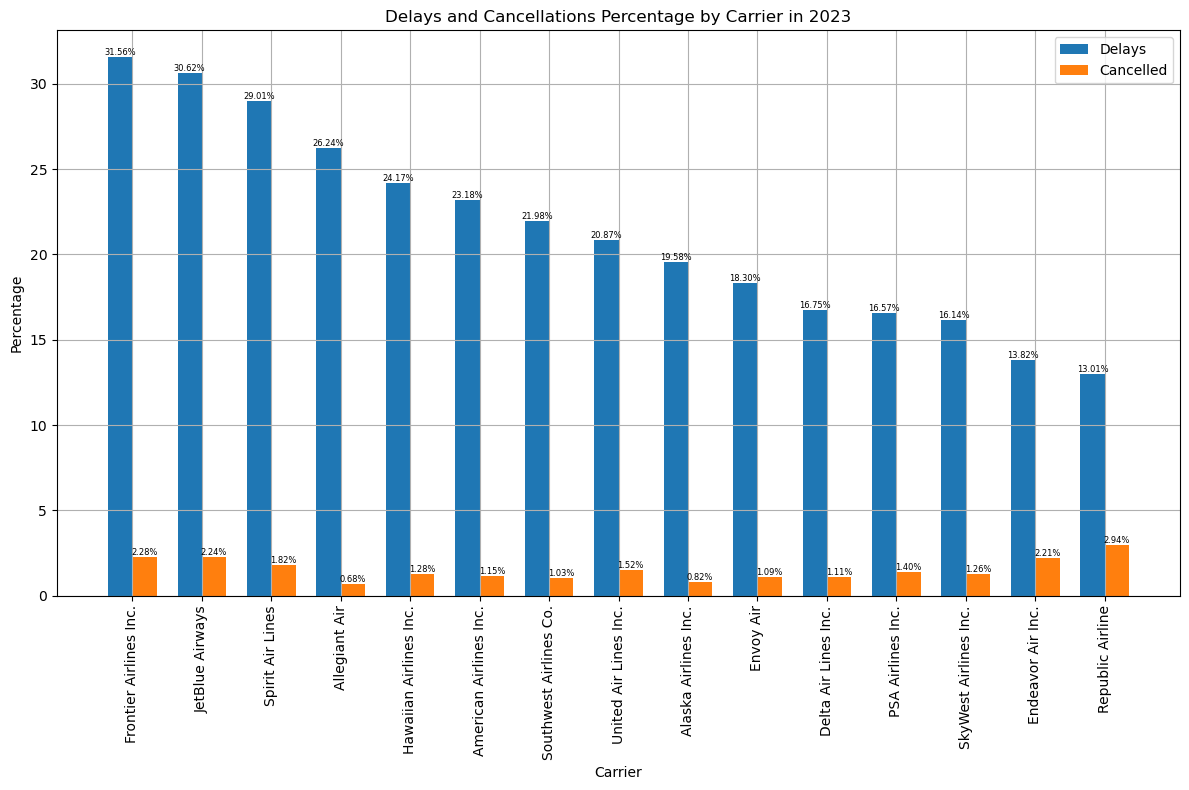

In [206]:
# Sort carriers by the number of delays in 2023
sorted_carriers = delays_by_carrier_2023_pct.sort_values(ascending=False).index

# Sort delays and cancellations data based on sorted carriers
sorted_delays_pct = delays_by_carrier_2023_pct.reindex(sorted_carriers)
sorted_cancelled_pct = cancelled_by_carrier_2023_pct.reindex(sorted_carriers)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(sorted_carriers))  # Convert index to numpy array

# Plot delays and cancellations for 2023
bars1 = ax.bar(index, sorted_delays_pct, bar_width, label='Delays')
bars2 = ax.bar(index + bar_width, sorted_cancelled_pct, bar_width, label='Cancelled')

# Adding labels and title
plt.title('Delays and Cancellations Percentage by Carrier in 2023')
plt.xlabel('Carrier')
plt.ylabel('Percentage')
plt.xticks(index + bar_width / 2, sorted_carriers, rotation=90)  # Set x-axis labels to carrier names
plt.legend()
plt.grid(True)
plt.tight_layout()

# Add percentage labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=6)

# Show plot
plt.show()